C:\Users\luisf\AppData\Local\Temp\ipykernel_38712\3835986857.py:10: DeprecationWarning: sipPyTypeDict() is deprecated, the extension module should use sipPyTypeDictRef() instead
  class PlotUpdater(QMainWindow):


Program initiated
Connection to Cyton board established successfully!
[[0.00000000e+00 1.00000000e+00 2.00000000e+00 ... 2.50000000e+02
  2.51000000e+02 2.52000000e+02]
 [1.16966975e+01 1.36303107e+01 1.53771418e+01 ... 1.17787873e+01
  1.35241173e+01 1.51536187e+01]
 [2.82545807e+01 3.55313589e+01 4.13867332e+01 ... 2.91958206e+01
  3.63087932e+01 3.85260106e+01]
 ...
 [8.30045774e+01 8.12560017e+01 9.34063812e+01 ... 9.97434049e+01
  9.34886706e+01 9.44816445e+01]
 [1.70940543e+09 1.70940543e+09 1.70940543e+09 ... 1.70940543e+09
  1.70940543e+09 1.70940543e+09]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
window opened
entering sleep
done sleeping
window should be closed by now
Session ended


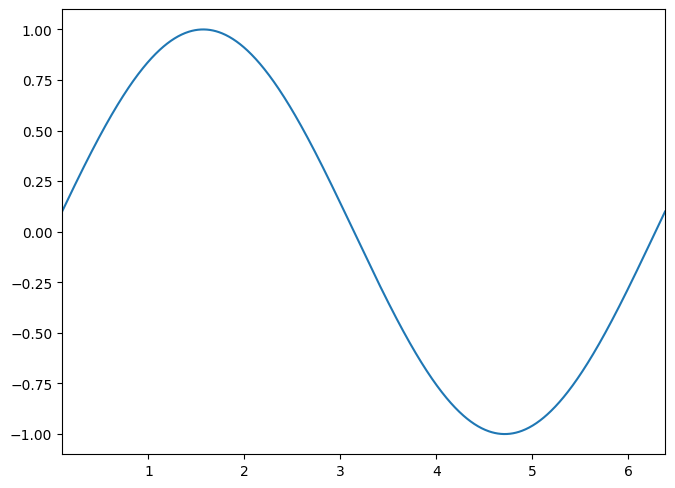

In [3]:
import sys
from functions_openBCI import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas
from PyQt5.QtWidgets import QMainWindow, QApplication, QVBoxLayout, QWidget
from PyQt5 import QtCore

class PlotUpdater(QMainWindow):
    def __init__(self):
        super().__init__()
        self.setWindowTitle("EEG electrodes")
        self.setGeometry(100, 100, 800, 600)

        self.central_widget = QWidget()
        self.setCentralWidget(self.central_widget)

        self.layout = QVBoxLayout()
        self.central_widget.setLayout(self.layout)

        self.fig, self.ax = plt.subplots()
        self.canvas = FigureCanvas(self.fig)
        self.layout.addWidget(self.canvas)

        self.x = np.linspace(0, 2 * np.pi, 1000)
        self.y = np.sin(self.x)

        self.line, = self.ax.plot(self.x, self.y)
        self.animation_timer = QtCore.QTimer(self)
        self.animation_timer.timeout.connect(self.update_plot)
        self.animation_timer.start(2000)  # Update plot every 50 milliseconds

    def update_plot(self):
        # Shift the sine wave to the right
        self.x += 0.1
        self.y = np.sin(self.x)

        # Update the data of the line plot
        self.line.set_xdata(self.x)
        self.line.set_ydata(self.y)

        # Adjust plot limits to keep the sine wave visible
        self.ax.set_xlim(self.x.min(), self.x.max())
        self.ax.set_ylim(-1.1, 1.1)

        # Redraw the plot
        self.canvas.draw()


if __name__ == "aaa":
    app = QApplication(sys.argv)
    window = PlotUpdater()
    window.show()
    sys.exit(app.exec_())

if  __name__ =="__main__":
    
    print("Program initiated")
    btype = "other" # [cyton, other]
    cyton = open_board(btype)
    time.sleep(1)
    signal = cyton.get_board_data();
    print(signal)
    
    app = QApplication(sys.argv)
    window = PlotUpdater()
    print("window opened")
    
    #window.update_data(signal)
    window.show()
    window.update_plot()
    print("entering sleep")
    time.sleep(50)
#   signal = cyton.get_board_data(); 
    print("done sleeping")
    
    window.close()
    print("window should be closed by now")

close_board(cyton)


In [2]:
close_board(cyton)


Session ended
